In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


All Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf

In [4]:
df=pd.read_csv('bajaj_data.csv')
df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
0,03-01-2000,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600
1,04-01-2000,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000
2,05-01-2000,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500
3,06-01-2000,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200
4,07-01-2000,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500


In [5]:
# Information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5235 non-null   object 
 1   Prev Close  5235 non-null   float64
 2   Open        5235 non-null   float64
 3   High        5235 non-null   float64
 4   Low         5235 non-null   float64
 5   Last        5235 non-null   float64
 6   Close       5235 non-null   float64
 7   VWAP        5235 non-null   float64
 8   Volume      5235 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 368.2+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
Date,,,,,,,,
2000-01-03,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600
2000-01-04,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000
2000-01-05,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500
2000-01-06,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200
2000-01-07,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500


<Axes: xlabel='Date'>

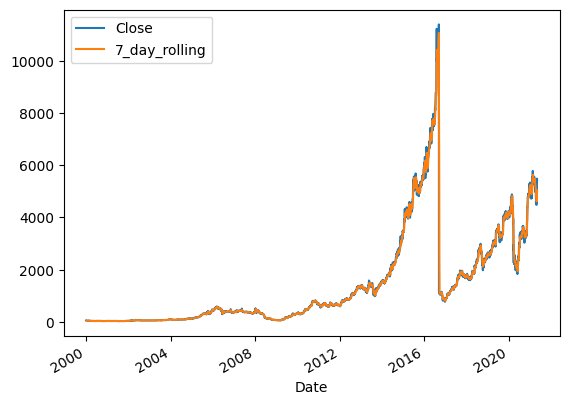

In [7]:
df['7_day_rolling']=df['Close'].rolling(window=7).mean()
df[['Close','7_day_rolling']].plot()

Data Exploring

In [8]:
#highest average month
df.resample('M').mean()['Close'].idxmax()

/tmp/ipython-input-8-3854628803.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').mean()['Close'].idxmax()


Timestamp('2016-08-31 00:00:00')

In [9]:
#calc daily return
df['daily_returns']=df['Close'].pct_change()*100
#more than 7% retruns
df[abs(df['daily_returns'])>7].head(10)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,7_day_rolling,daily_returns
Date,,,,,,,,,,
2000-01-05,48.10,46.55,47.40,44.60,44.60,44.60,45.47,3500,NaN,-7.276507
2000-01-19,38.30,40.90,41.40,39.25,41.40,41.40,40.57,4500,39.628571,8.093995
2000-02-09,38.70,41.60,41.80,40.90,41.80,41.80,41.67,7100,38.307143,8.010336
2000-02-10,41.80,45.15,45.15,42.65,45.15,45.15,43.91,13200,39.607143,8.014354
2000-02-11,45.15,48.80,48.80,48.00,48.80,48.80,48.73,10700,41.192857,8.084164
2000-02-14,48.80,50.75,50.75,44.90,44.90,44.90,47.09,4800,42.292857,-7.991803
2000-02-15,44.90,42.05,43.00,41.35,41.35,41.35,41.69,6200,42.778571,-7.906459
2000-03-06,37.00,36.05,37.95,34.25,34.35,34.35,35.42,4400,38.450000,-7.162162
2000-03-15,33.15,35.25,35.80,34.25,35.80,35.80,35.13,2700,34.842857,7.993967


Data Visualization

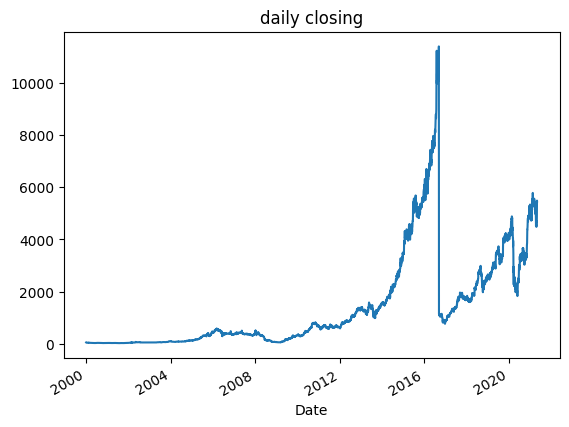

In [10]:
 #daily closing
 df['Close'].plot(title='daily closing')
 plt.show()

/tmp/ipython-input-11-175545353.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y').sum()['Volume'].plot()


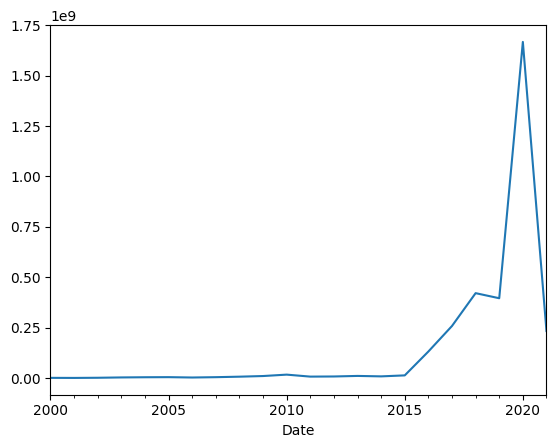

In [11]:
#yearly volume
df.resample('Y').sum()['Volume'].plot()
plt.show()

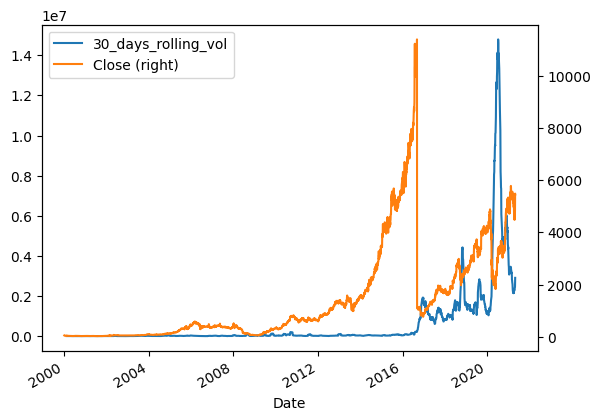

In [12]:
df['30_days_rolling_vol']=df['Volume'].rolling(window=30).mean()
df['30_days_rolling_vol'].plot(legend=True)
ax=df['Close'].plot(secondary_y=True, legend=True)
plt.show()

In [13]:
#correlation
df[['Close', '30_days_rolling_vol']].corr()

,Close,30_days_rolling_vol
Close,1.00000,0.29698
30_days_rolling_vol,0.29698,1.00000


Seasonality

/tmp/ipython-input-14-2135217920.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['Close'].resample('M').mean())


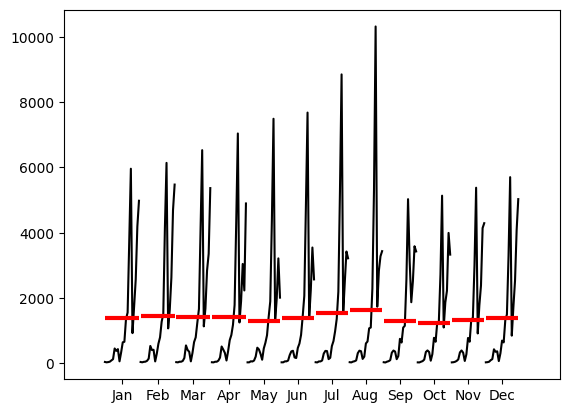

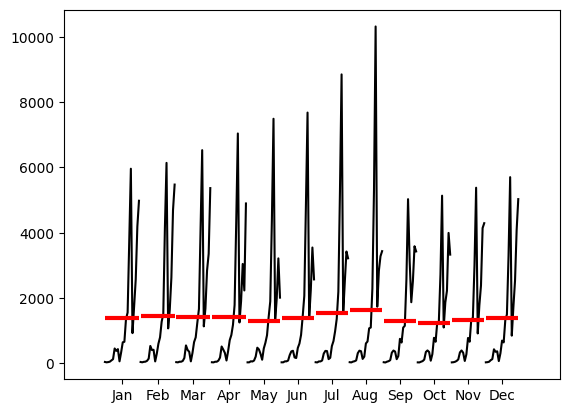

In [14]:
#plotting the seasonality monthly
month_plot(df['Close'].resample('M').mean())

/tmp/ipython-input-15-3868662936.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['Close'].resample('Q').mean())


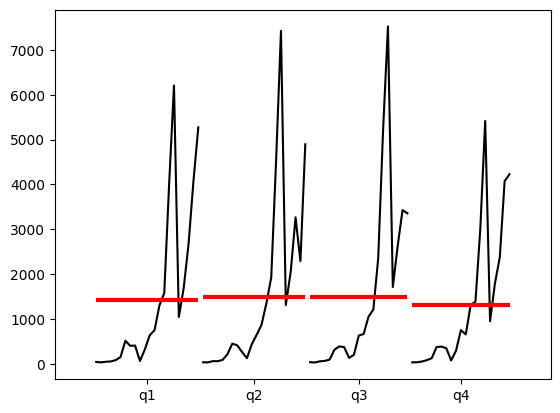

In [15]:
#quarterly seasonality plotting
quarter_plot(df['Close'].resample('Q').mean())
plt.show()

Seasonal Decompose

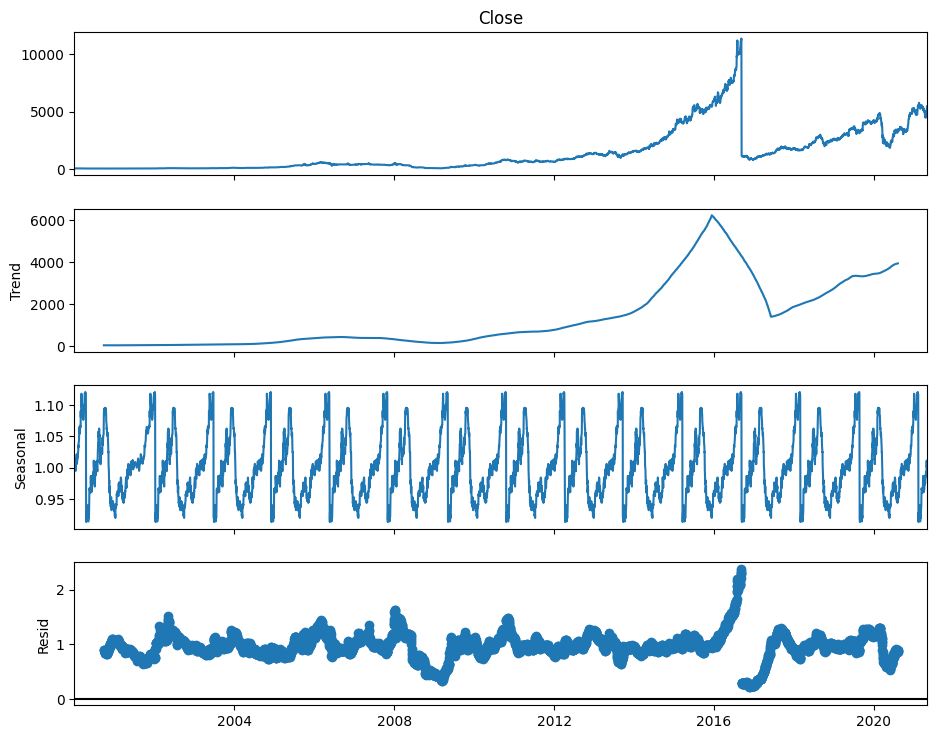

In [16]:
#seasonal decompose
decompose=seasonal_decompose(df['Close'],
                             model='multiplicative',
                             period= 365)
fig1=decompose.plot()
fig1.set_size_inches(10,8)
plt.show()

Auto Correlation

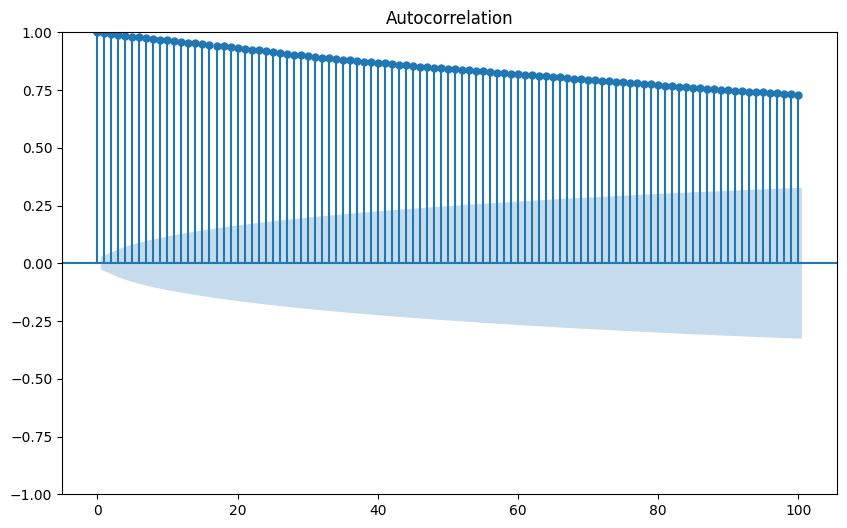

In [17]:
#plot the auto correlation
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(df['Close'],lags = 100, ax=ax)
plt.show()

Partial Auto Correlation

/tmp/ipython-input-18-367497809.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


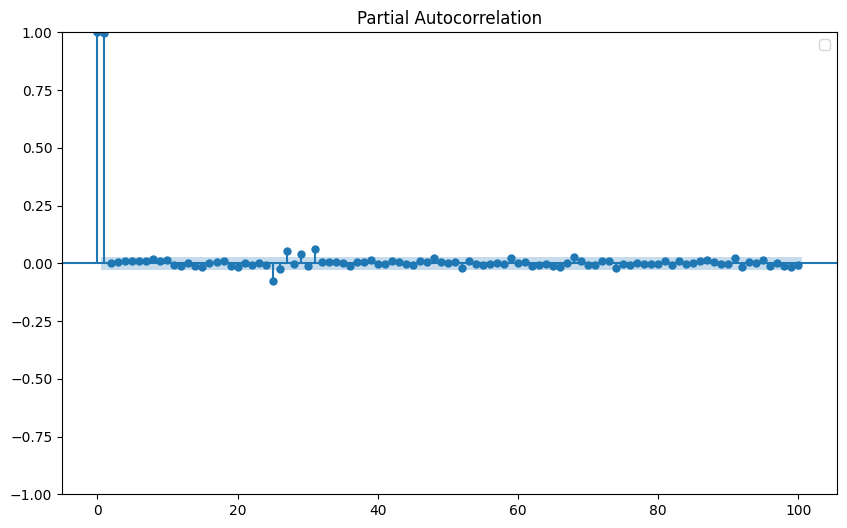

In [18]:
#plot the pacf
fig, ax = plt.subplots(figsize=(10,6))
plot_pacf(df['Close'],lags = 100, ax=ax)
plt.legend()
plt.show()

Arima Model

In [19]:
# Train ARIMA model
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

arima_model = ARIMA(train, order=(5,1,0))  # (p,d,q)
arima_result = arima_model.fit()

# Forecast
arima_forecast = arima_result.forecast(steps=len(test))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()


NameError: name 'data' is not defined

Sarima Model

In [20]:
sarima_model = SARIMAX(train,
                       order=(1,1,1),
                       seasonal_order=(1,1,1,5),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()

# Forecast
sarima_forecast = sarima_result.get_forecast(steps=len(test))
sarima_pred = sarima_forecast.predicted_mean

# Plot
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, sarima_pred.values, label='SARIMA Forecast')
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.show()


NameError: name 'train' is not defined

LTSM Model

In [21]:
# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Prepare sequences
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

look_back = 60
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Train/test split
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.plot(data.index[-len(predicted):], actual, label='Actual')
plt.plot(data.index[-len(predicted):], predicted, label='LSTM Forecast')
plt.title("LSTM Forecast vs Actual")
plt.legend()
plt.show()


NameError: name 'data' is not defined

Model Evaluation

In [22]:
def evaluate_model(true, predicted, model_name):
    rmse = np.sqrt(mean_squared_error(true, predicted))
    mae = mean_absolute_error(true, predicted)
    mape = mean_absolute_percentage_error(true, predicted)
    r2 = r2_score(true, predicted)
    print(f"{model_name} Evaluation:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  MAPE: {mape:.2%}")
    print(f"  R2 Score: {r2:.2f}\n")

evaluate_model(test, arima_forecast, "ARIMA")
evaluate_model(test, sarima_forecast, "SARIMA")
evaluate_model(y_test_actual, lstm_pred, "LSTM")

NameError: name 'test' is not defined